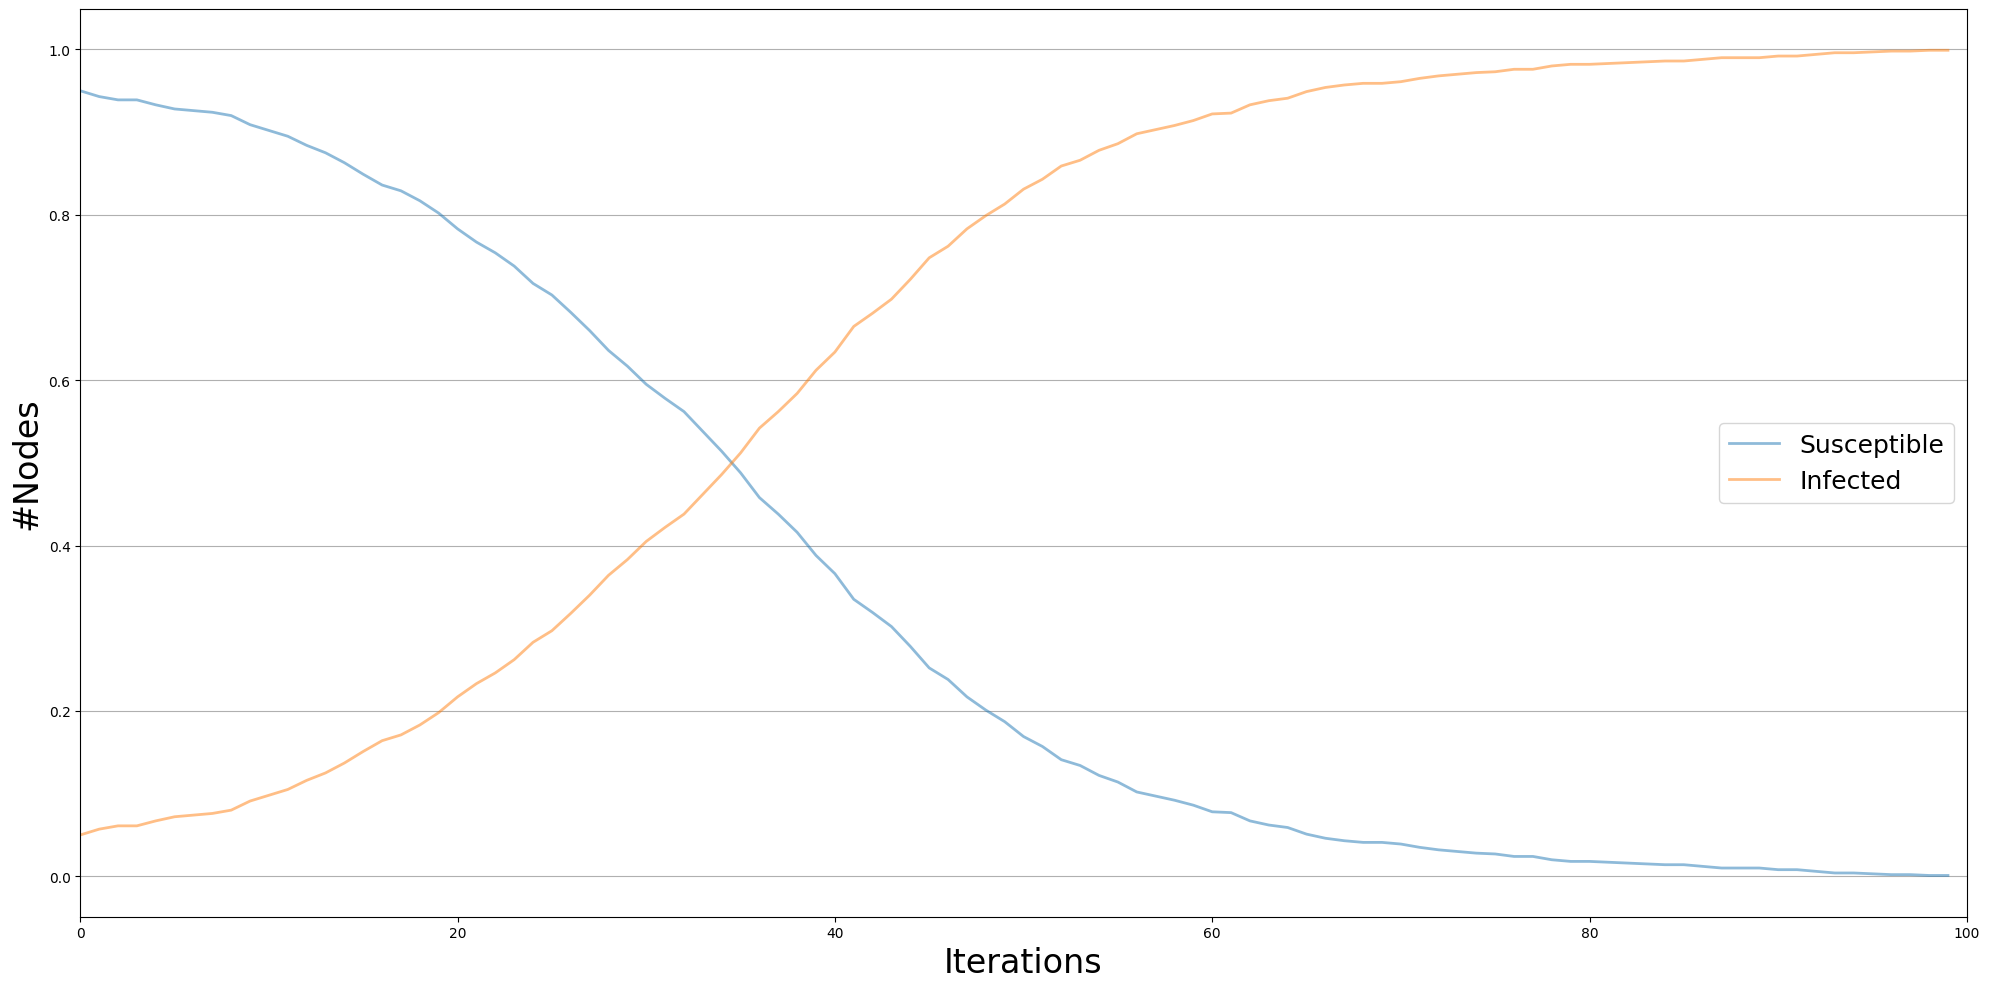

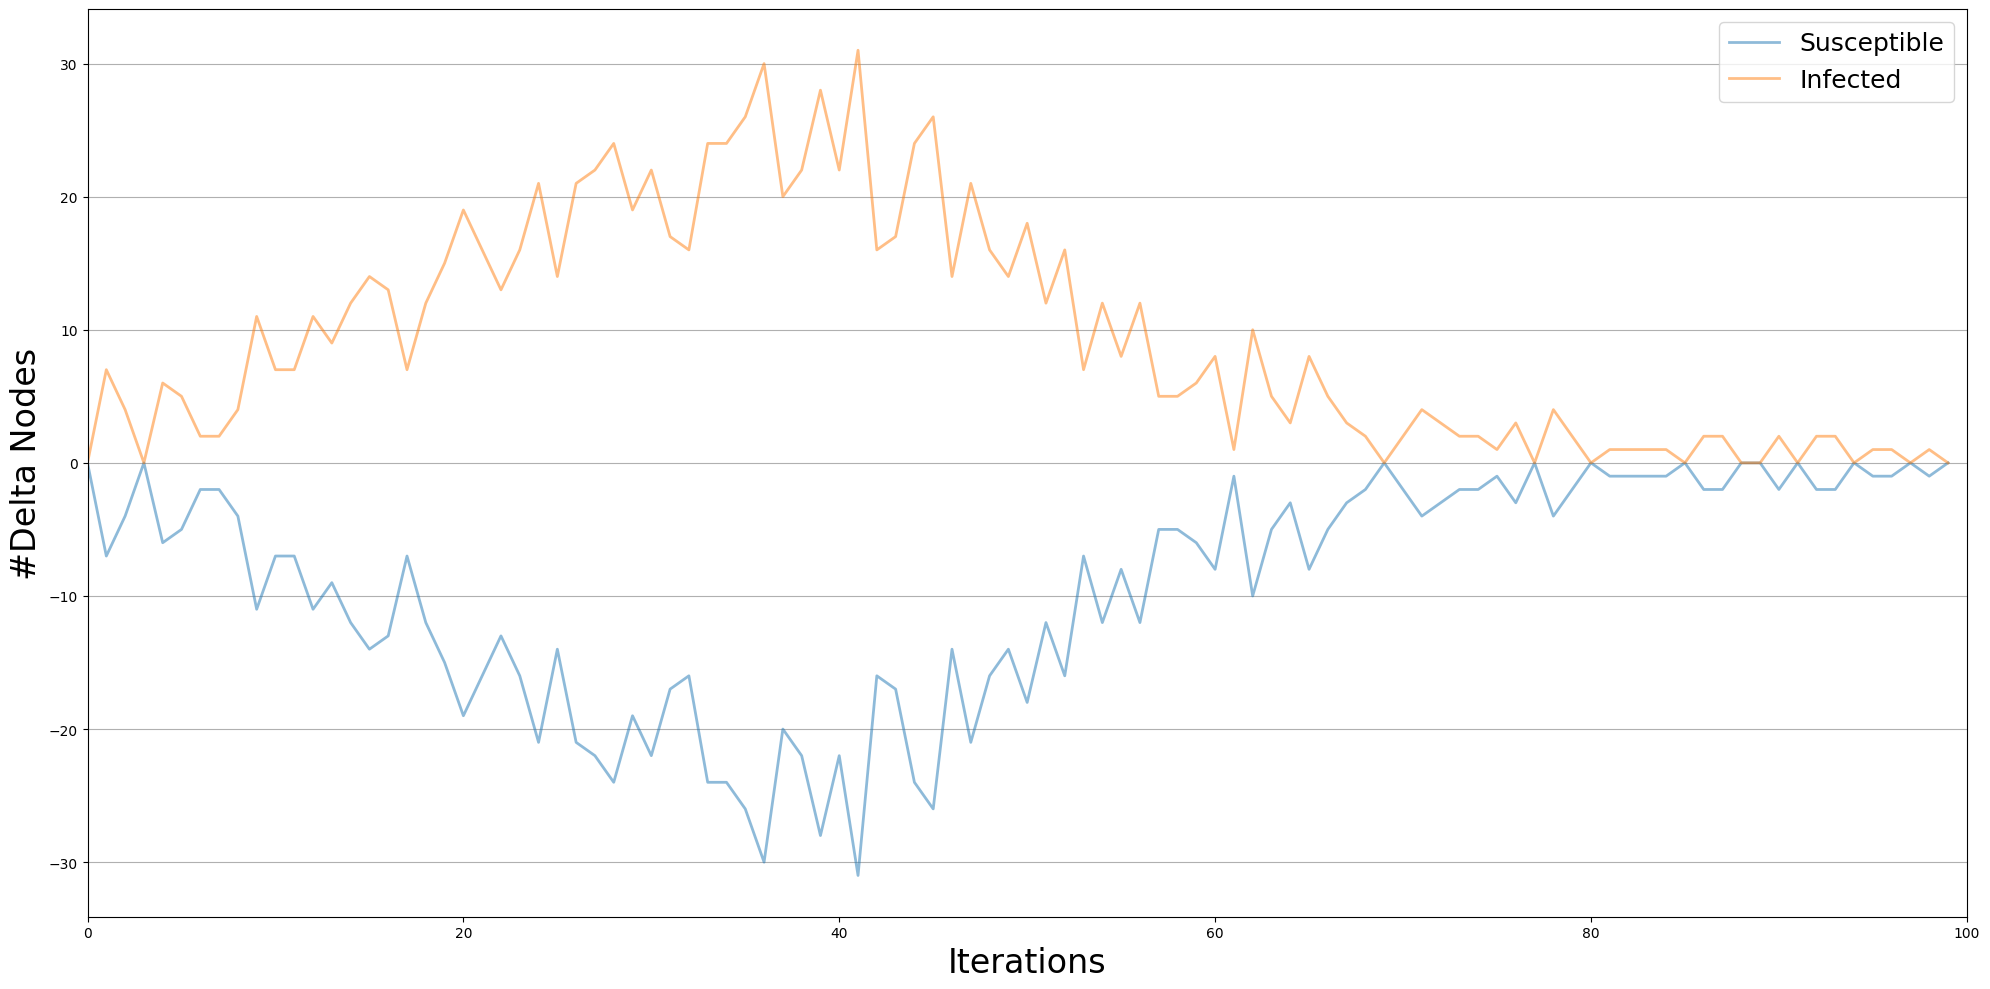

In [18]:
'''
SI model assumes that if, during a generic iteration, a susceptible node comes into contact with an
infected one, it becomes infected with probability β: once a node becomes infected, it stays 
infected (the only transition allowed is S→I).

Statuses:
    - S: susceptible
    - I: infected
    
Parameters:
    - β: infection probability (float in [0,1])
    - fraction_infected: fraction of initially infected nodes
    - infected: list of infected nodes (has priority over fraction_infected)
'''

import networkx as nx
import ndlib.models.ModelConfig as mc
import ndlib.models.epidemics as ep
from ndlib.viz.mpl.DiffusionTrend import DiffusionTrend
from ndlib.viz.mpl.DiffusionPrevalence import DiffusionPrevalence

# Network topology
g = nx.erdos_renyi_graph(1000, 0.1)

# Model selection
model = ep.SIModel(g)

# Model Configuration
config = mc.Configuration()
config.add_model_parameter('beta', 0.001)
config.add_model_parameter("fraction_infected", 0.05)
model.set_initial_status(config)

# Simulation execution
iterations = model.iteration_bunch(100)
trends = model.build_trends(iterations)
#print(json.dumps(trends, indent=1))

%matplotlib inline
viz = DiffusionTrend(model, trends)
viz.plot()

viz = DiffusionPrevalence(model, trends)
viz.plot()
